# Projeto Reciclagem ...


# Carregando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a base de Dados

In [2]:
# Carregar a planilha
file_path = 'compras_reciclagem_2024.xlsx'
df = pd.read_excel(file_path)

# Renomear colunas
df['Data'] = pd.to_datetime(df['Data'])
colunas = ('rp_cat', 'fornecedor', 'data', 'produto', 'categoria', 'qtde', 'preco', 'valor')
df.columns = colunas
df = df[df['categoria'] != 'MADEIRA']

In [3]:
### serve para analisar se há dados faltantes na planilha e os data type das colunas ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80907 entries, 0 to 80936
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rp_cat      80907 non-null  object        
 1   fornecedor  80907 non-null  object        
 2   data        80907 non-null  datetime64[ns]
 3   produto     80907 non-null  object        
 4   categoria   80907 non-null  object        
 5   qtde        80907 non-null  float64       
 6   preco       80907 non-null  float64       
 7   valor       80907 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 5.6+ MB


## Filtrando o Dataset

In [4]:
# Especificando o mês e ano que você deseja filtrar
mes_especifico = 11  # alterar aqui para filtrar todos os gráficos e atualizar!
ano_especifico = 2023

# Filtrando os dados para o mês e ano específicos
df_filtrado = df[(df['data'].dt.month == mes_especifico) & (df['data'].dt.year == ano_especifico)]


## Gráfico 1: Distribuição das Categorias dos Produtos

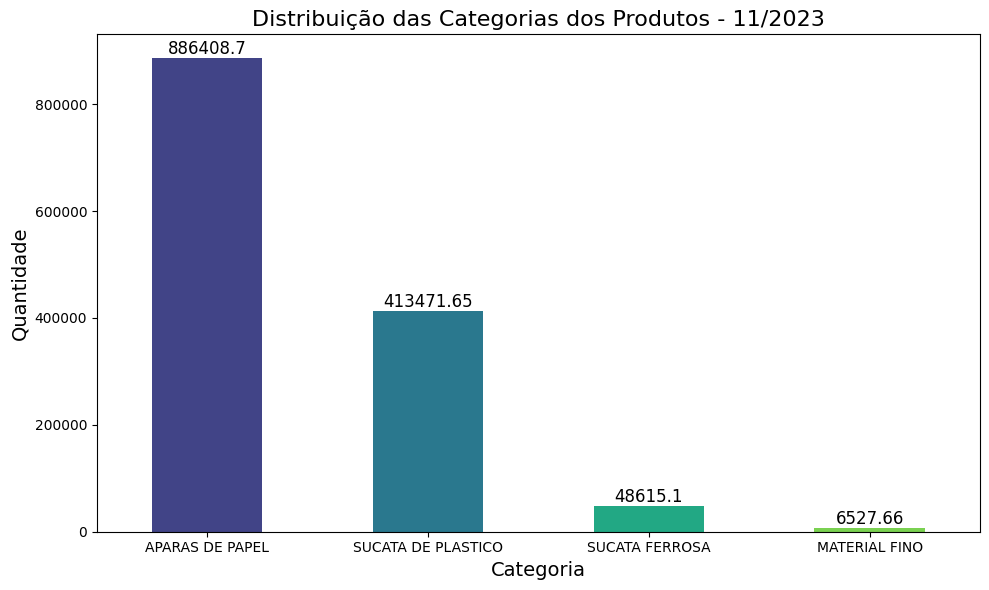

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10676\1354598521.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='qtde', palette='viridis')


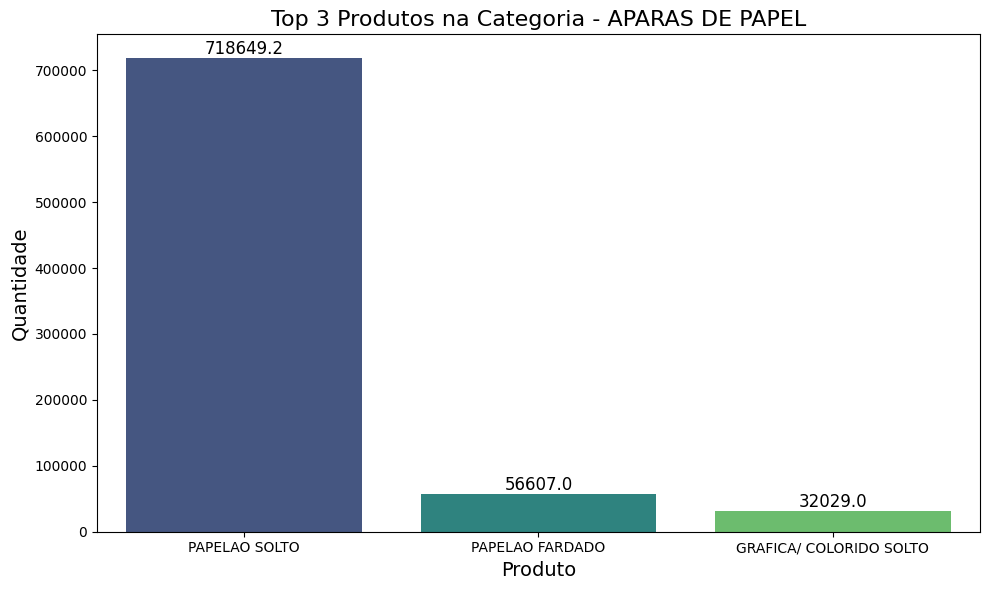

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10676\1354598521.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='qtde', palette='viridis')


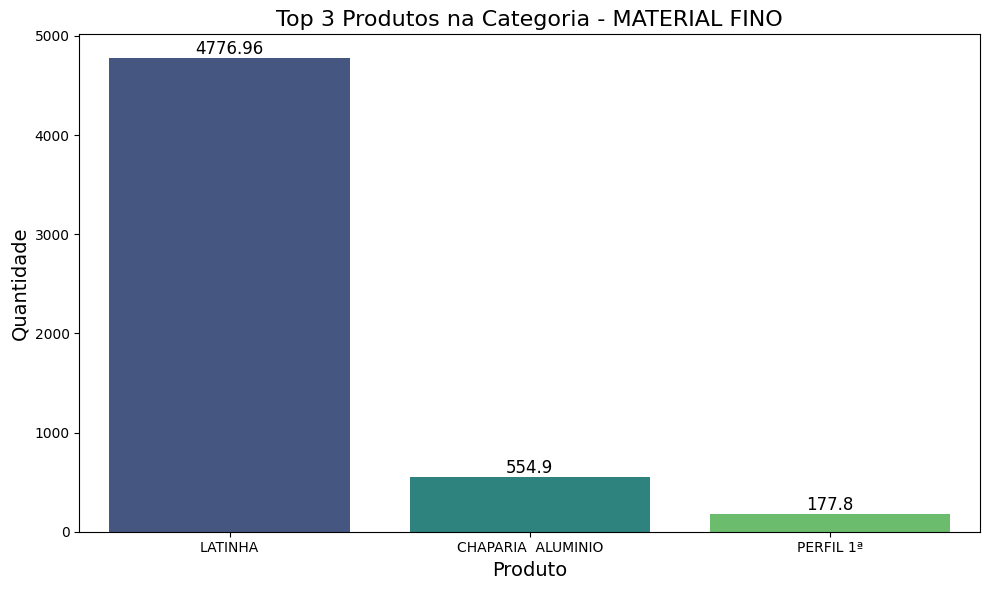

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10676\1354598521.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='qtde', palette='viridis')


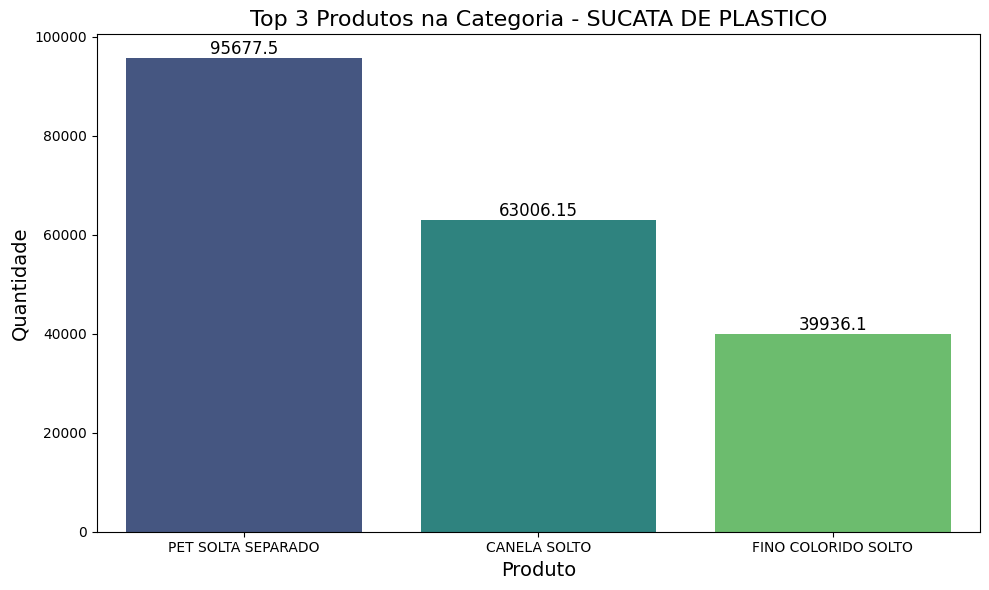

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10676\1354598521.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='qtde', palette='viridis')


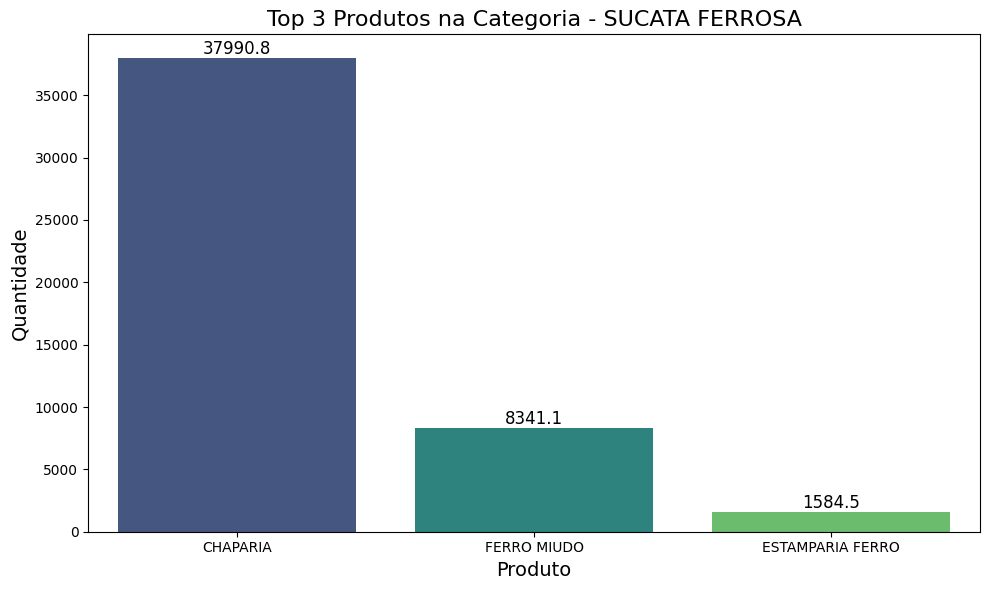

In [5]:
# Agrupando as categorias e somando as quantidades
quantidade_por_categoria = df_filtrado.groupby('categoria')['qtde'].sum().sort_values(ascending=False)

# Garantindo que há categorias para plotar
if not quantidade_por_categoria.empty:
    # Plotando o gráfico de barras para as categorias
    plt.figure(figsize=(10, 6))
    ax = quantidade_por_categoria.plot.bar(color=sns.color_palette('viridis', quantidade_por_categoria.nunique()))

    # Formatando o gráfico
    ax.set_xlabel('Categoria', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'Distribuição das Categorias dos Produtos - {mes_especifico}/{ano_especifico}', fontsize=16)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Adicionando os valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    plt.show()
else:
    print("Nenhum dado disponível para o mês e ano especificados.")

# Filtrando os três principais produtos por categoria
top_produtos_por_categoria = df_filtrado.groupby(['categoria', 'produto'])['qtde'].sum().reset_index()
top_produtos_por_categoria = top_produtos_por_categoria.sort_values(['categoria', 'qtde'], ascending=[True, False])
top_produtos_por_categoria = top_produtos_por_categoria.groupby('categoria').head(3)

# Criando gráficos de barras separados para cada categoria
categorias = top_produtos_por_categoria['categoria'].unique()

for categoria in categorias:
    df_categoria = top_produtos_por_categoria[top_produtos_por_categoria['categoria'] == categoria]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_categoria, x='produto', y='qtde', palette='viridis')

    # Formatando o gráfico
    ax.set_xlabel('Produto', fontsize=14)
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_title(f'Top 3 Produtos na Categoria - {categoria}', fontsize=16)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Adicionando os valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    plt.show()

## Curva Sazonal por Qtde (KG)

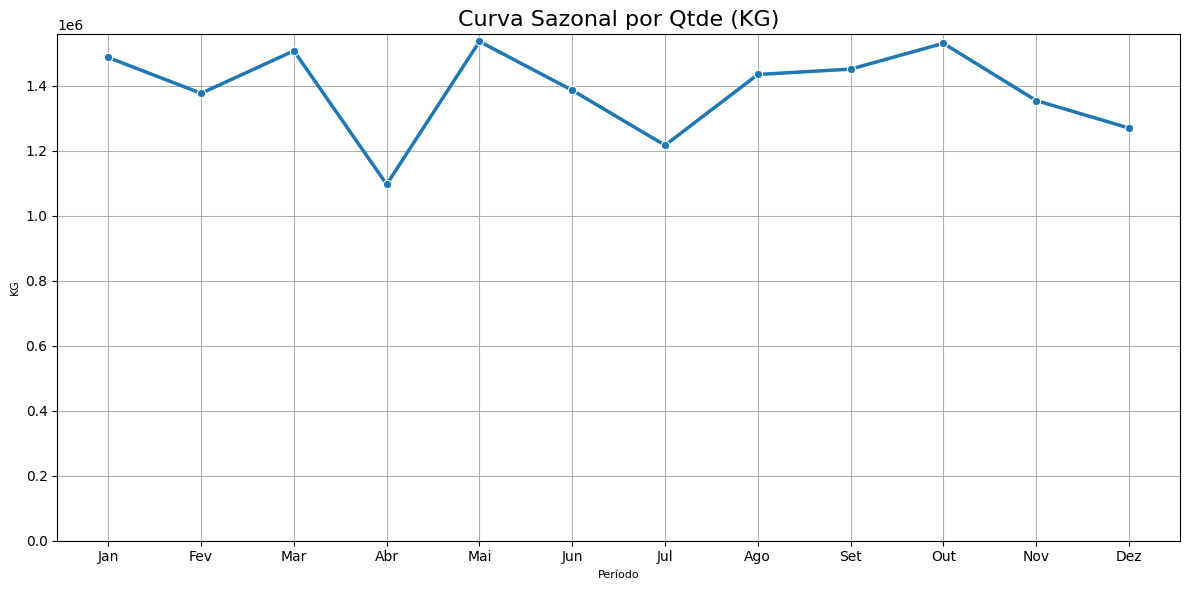

In [6]:
# Agrupando por mês e somando as quantidades para o ano inteiro
df['mes'] = df['data'].dt.month
quantidade_por_mes = df.groupby('mes')['qtde'].sum().reset_index()

# Mapeando os números dos meses para os nomes dos meses
meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
quantidade_por_mes['mes'] = quantidade_por_mes['mes'].map(meses)

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=quantidade_por_mes, x='mes', y='qtde', marker='o', linewidth=2.5)

# Formatando o gráfico
plt.xlabel('Período', fontsize=8)
plt.ylabel('KG', fontsize=8)
plt.title('Curva Sazonal por Qtde (KG)', fontsize=16)
plt.xticks(rotation=0)
plt.ylim(0)  # Configurando o eixo Y para começar do zero
plt.grid(True)
plt.tight_layout()

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10676\529689286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_5_fornecedores_quantidade, x='qtde', y='fornecedor', palette='viridis')


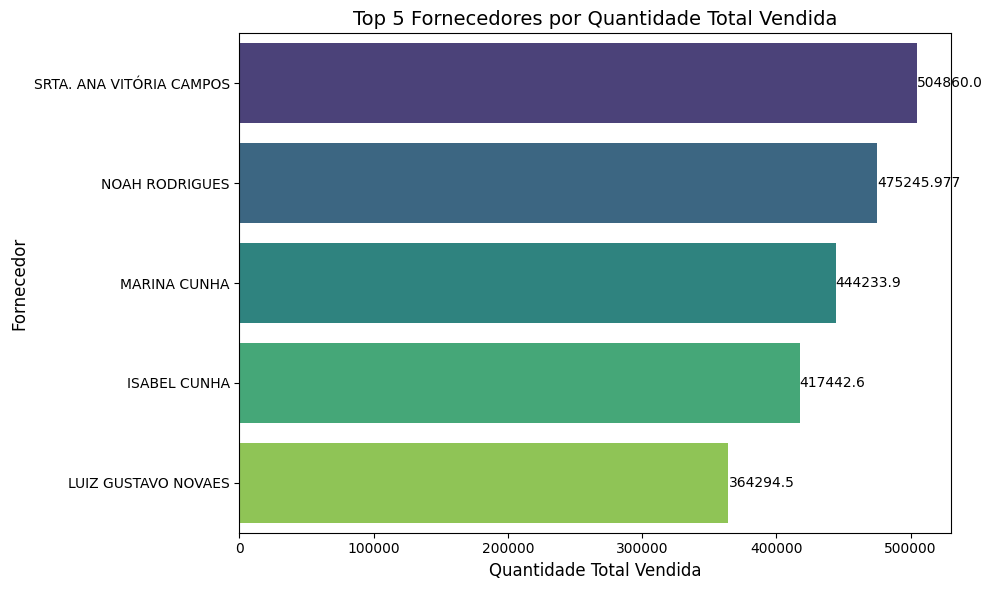

In [7]:
# Top 5 fornecedores por quantidade total vendida
top_5_fornecedores_quantidade = df.groupby('fornecedor')['qtde'].sum().reset_index().sort_values(by='qtde', ascending=False).head(5)

# Gráfico dos top 5 fornecedores por quantidade total vendida
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_fornecedores_quantidade, x='qtde', y='fornecedor', palette='viridis')
ax.set_title('Top 5 Fornecedores por Quantidade Total Vendida', fontsize=14)
ax.set_xlabel('Quantidade Total Vendida', fontsize=12)
ax.set_ylabel('Fornecedor', fontsize=12)

# Adicionar rótulos de dados
for index, value in enumerate(top_5_fornecedores_quantidade['qtde']):
    ax.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()


## Movimento por Semana e Dia da Semana

        data  semana_mes  dia_da_semana
0 2023-01-02           2              0
1 2023-01-02           2              0
2 2023-01-02           2              0
3 2023-01-02           2              0
4 2023-01-02           2              0
           Segunda       Terça      Quarta     Quinta       Sexta  Sábado  \
1ª sem   66597.700  120755.310  287844.995  382785.63  585998.940  4948.0   
2ª sem  683995.340  803903.766  743863.995  858803.00  890508.407     0.0   
3ª sem  762339.690  742184.040  746522.900  815781.93  852156.835     0.0   
4ª sem  784080.695  774729.900  783427.400  768103.96  780983.788     0.0   
5ª sem  627555.440  645497.000  631598.950  692755.60  512256.400  1582.2   

        Domingo  
1ª sem        0  
2ª sem        0  
3ª sem        0  
4ª sem        0  
5ª sem        0  


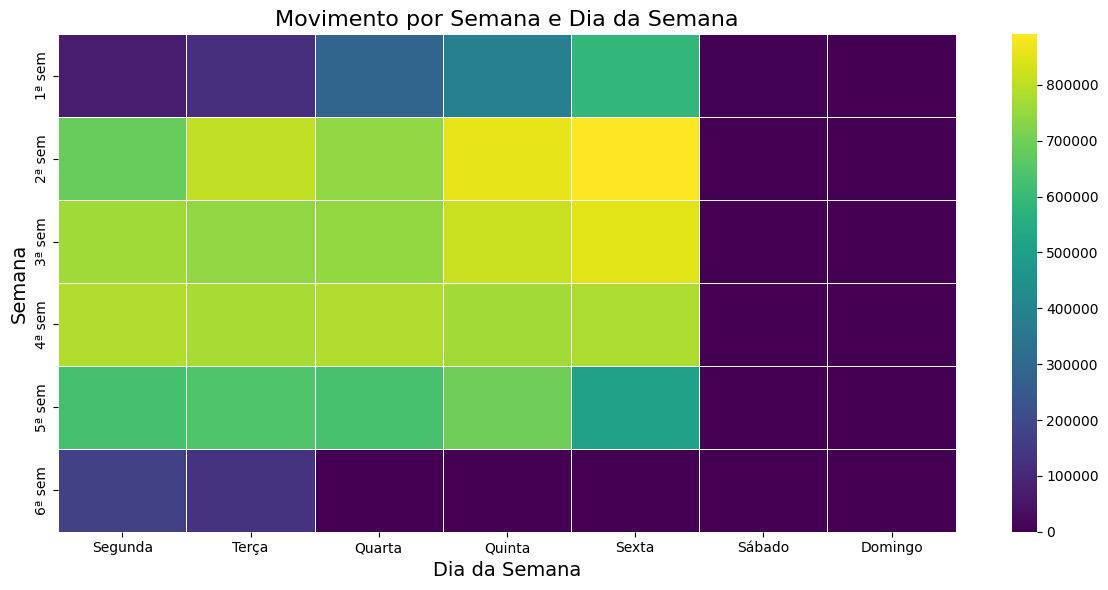

In [8]:
# Função para calcular a semana dentro do mês
def semana_do_mes(d):
    first_day = d.replace(day=1)
    dom = first_day - pd.Timedelta(days=first_day.weekday())
    return (d - dom).days // 7 + 1

# Adicionando colunas para a semana do mês e o dia da semana
df_filtrado = df.copy()
df_filtrado['semana_mes'] = df_filtrado['data'].apply(semana_do_mes)
df_filtrado['dia_da_semana'] = df_filtrado['data'].dt.dayofweek

# Verificando se as colunas foram adicionadas corretamente
print(df_filtrado[['data', 'semana_mes', 'dia_da_semana']].head())

# Agrupando por semana do mês e dia da semana e somando as quantidades
movimento_por_dia = df_filtrado.groupby(['semana_mes', 'dia_da_semana'])['qtde'].sum().unstack().fillna(0)

# Garantindo que todas as colunas dos dias da semana estejam presentes
dias_da_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
movimento_por_dia = movimento_por_dia.reindex(columns=range(7), fill_value=0)
movimento_por_dia.columns = dias_da_semana

# Renomeando os índices das semanas para "1ª sem", "2ª sem", etc.
semanas = [f'{i}ª sem' for i in movimento_por_dia.index]
movimento_por_dia.index = semanas

# Verificando o DataFrame resultante
print(movimento_por_dia.head())

# Plotando o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(movimento_por_dia, annot=False, cmap="viridis", cbar=True, linewidths=.5)

# Formatando o gráfico
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Semana', fontsize=14)
plt.title('Movimento por Semana e Dia da Semana', fontsize=16)
plt.tight_layout()

plt.show()

array([[<Axes: title={'center': 'data'}>,
        <Axes: title={'center': 'qtde'}>,
        <Axes: title={'center': 'preco'}>],
       [<Axes: title={'center': 'valor'}>,
        <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'semana_mes'}>],
       [<Axes: title={'center': 'dia_da_semana'}>, <Axes: >, <Axes: >]],
      dtype=object)

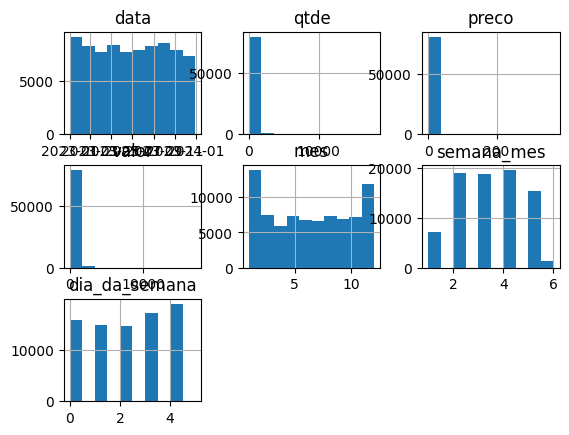

In [9]:
df_filtrado.hist()